In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/kaggle_titanic_train.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [6]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [8]:
df.groupby(['Sex','Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [14]:
df.groupby(['Pclass','Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [16]:
stacked = df.stack()
stacked

0    PassengerId                          1
     Survived                             0
     Pclass                               3
     Name           Braund, Mr. Owen Harris
     Sex                               male
                             ...           
890  Parch                                0
     Ticket                          370376
     Fare                              7.75
     Embarked                             Q
     Age_Group                         30.0
Length: 10540, dtype: object

In [17]:
stacked.unstack()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,NaN,S,20.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S,10.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C,20.0


In [9]:
import math

In [19]:
df.Age.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [20]:
df.Age.where()

NameError: name 'none' is not defined

In [11]:
age_series = df.Age.dropna().apply(lambda age:math.floor(age/10)*10)
age_series.name = 'Age_Group'

In [12]:
age_series[:10]

0     20
1     30
2     20
3     30
4     30
6     50
7      0
8     20
9     10
10     0
Name: Age_Group, dtype: int64

In [15]:
df = pd.concat([df,age_series],axis=1,)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [21]:
df.Age_Group = df.Age_Group.fillna('확인불명')

In [22]:
df.Age_Group.head(10)

0    20.0
1    30.0
2    20.0
3    30.0
4    30.0
5    확인불명
6    50.0
7     0.0
8    20.0
9    10.0
Name: Age_Group, dtype: object

In [24]:
age_group_df = df.groupby('Age_Group').size()
age_group_df

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [28]:
df.groupby('Age_Group').size()

Age_Group
0.0      62
10.0    102
20.0    220
30.0    167
40.0     89
50.0     48
60.0     19
70.0      6
80.0      1
확인불명    177
dtype: int64

In [33]:
len(df)

891

In [42]:
?df.agg

In [63]:
df.groupby('Age_Group').agg({'Survived':'mean'})

,Survived
Age_Group,
0.0,0.612903
10.0,0.401961
20.0,0.350000
30.0,0.437126
40.0,0.382022
50.0,0.416667
60.0,0.315789
70.0,0.000000
80.0,1.000000


In [38]:
df.groupby('Pclass').agg({'Survived':'mean'})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [39]:
df.groupby('Sex').agg({'Survived':'mean'})

,Survived
Sex,
female,0.742038
male,0.188908


In [40]:
df.groupby("Sex").agg({"Survived": "sum"})

,Survived
Sex,
female,233
male,109


In [41]:
233/314,109/577

(0.7420382165605095, 0.18890814558058924)

In [57]:
?pd.crosstab

In [46]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [ ]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True
)  

In [59]:
?df.pivot_table

In [47]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [62]:
df.pivot_table(
    "Survived",
    "Sex",
    'Age_Group',
    #"Pclass",     
    # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
    aggfunc = 'mean',
    margins = True,
)

Age_Group,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,확인불명,All
Sex,,,,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,NaN,NaN,0.679245,0.742038
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.0,1.0,0.129032,0.188908
All,0.612903,0.401961,0.350000,0.437126,0.382022,0.416667,0.315789,0.0,1.0,0.293785,0.383838


In [66]:
df.groupby(["Pclass", "Sex"]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [64]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [65]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [76]:
result_df = temp_df.div(temp_df.sum(axis=0),axis=1)
result_df

Pclass,1,2,3
Sex,,,
female,0.435185,0.413043,0.293279
male,0.564815,0.586957,0.706721


In [69]:
result_df = temp_df.div(temp_df.sum(axis=1),axis=0)
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [75]:
print(type(result_df))

<class 'pandas.core.frame.DataFrame'>


In [70]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

In [71]:
plt.rcParams['figure.figsize'] = (12,8)

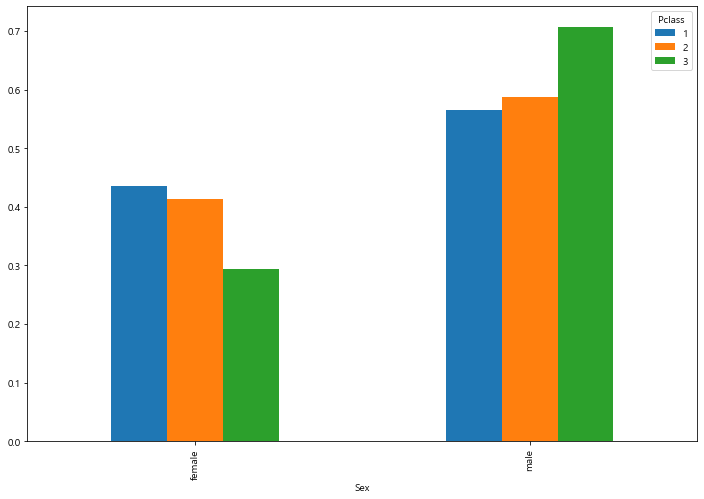

In [77]:
bar_plot = result_df.plot.bar()

<AxesSubplot:title={'center':'Titanic'}, ylabel='Sex'>

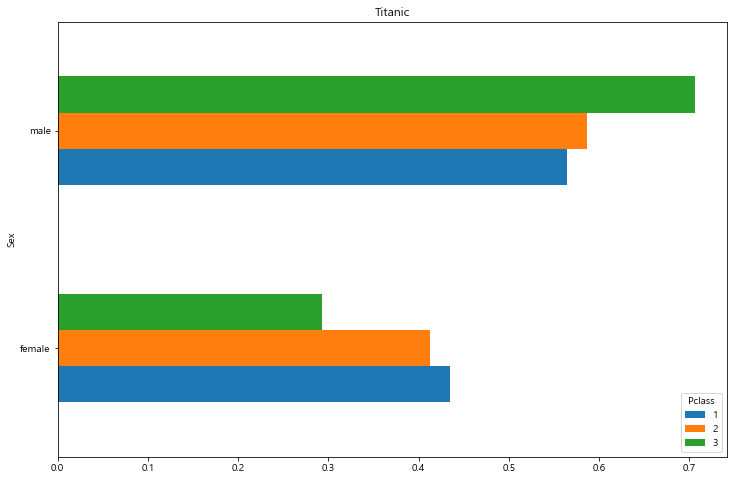

In [78]:
result_df.plot(kind='barh',title='Titanic')

<AxesSubplot:title={'center':'Titanic'}, ylabel='Sex'>

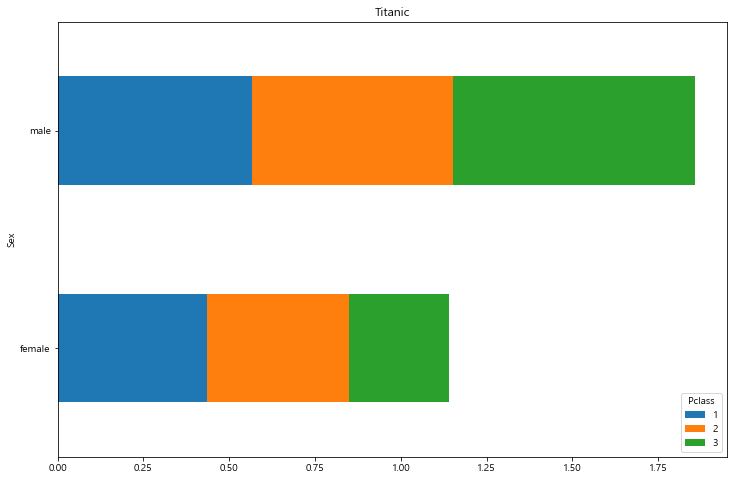

In [79]:
result_df.plot(kind='barh',title='Titanic',stacked=True)

In [80]:
plt.rcParams['figure.figsize'] = (12,12)

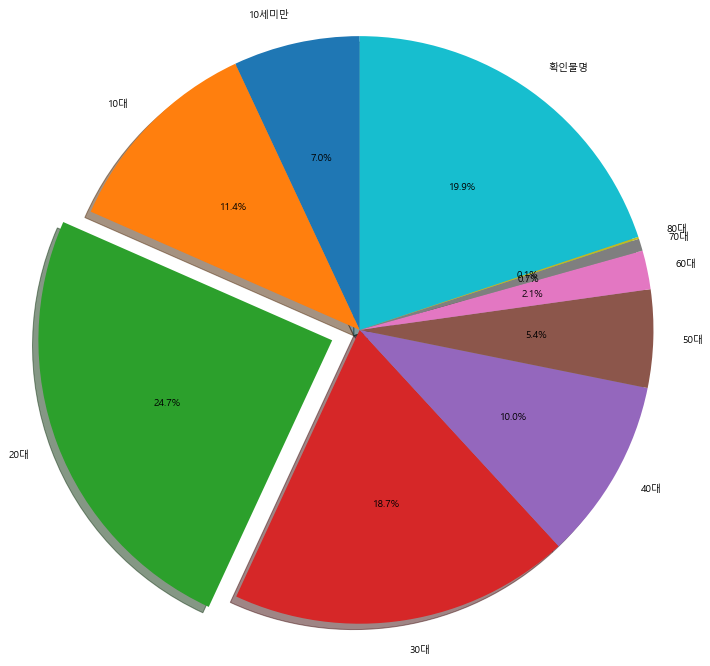

In [88]:
labels = list(age_group_df.index)

# labels

labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']

sizes = list(age_group_df.values)
explode = (0,0,0.1,0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle=90)

ax1.axis('equal')

plt.show()

# len(labels)

In [ ]:
labels = list(age_group_df.index)

# labels

labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']

sizes = list(age_group_df.values)
explode = (0,0,0.1,0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%',
       shadow = True, startangle=90)

ax1.axis('equal')

plt.show()

# len(labels)

In [90]:
?plt.subplots

In [91]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


In [92]:
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:title={'center':'Titanic'}, xlabel='Sex'>

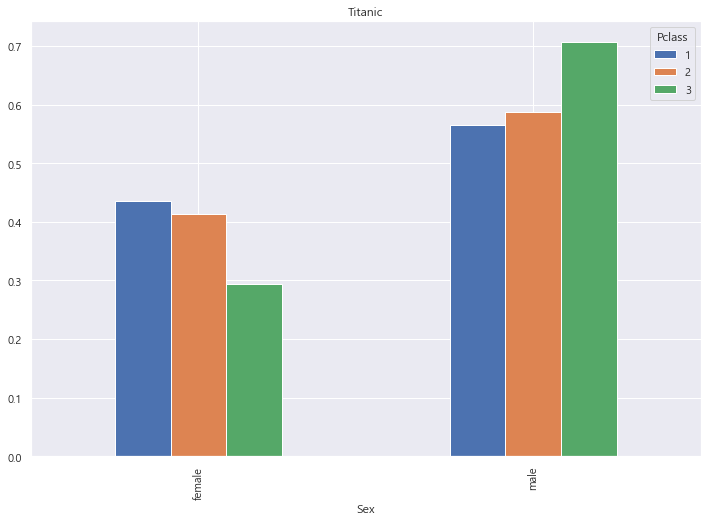

In [93]:
result_df.plot.bar(title='Titanic')

<AxesSubplot:title={'center':'Titanic'}, ylabel='Sex'>

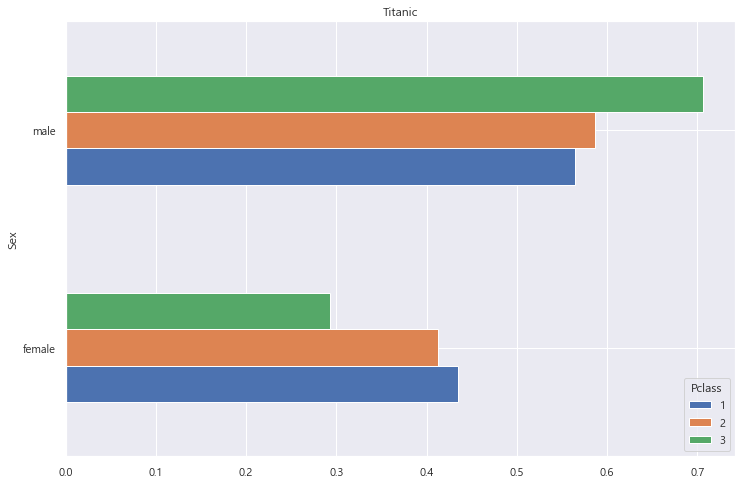

In [94]:
result_df.plot(kind='barh',title='Titanic')

<AxesSubplot:title={'center':'Titanic'}, ylabel='Sex'>

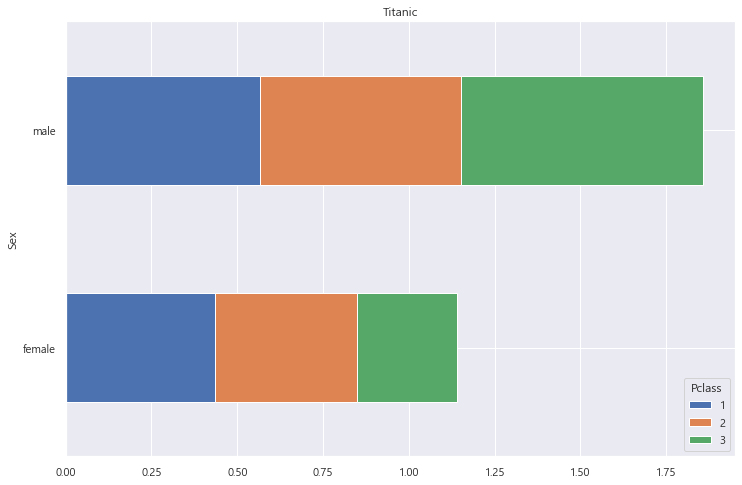

In [95]:
result_df.plot(kind='barh',title='Titanic',stacked=True)

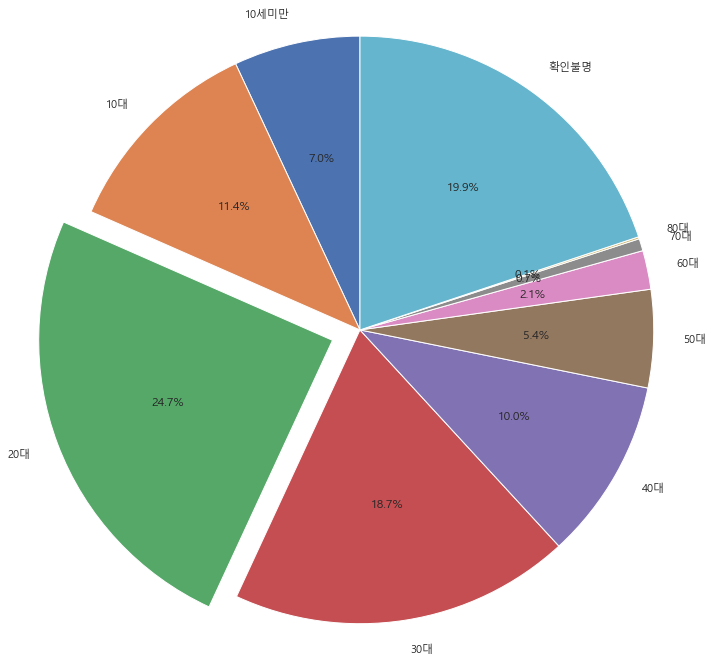

In [101]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']
sizes = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(sizes,explode=explode, labels = labels, autopct = 
       '%1.1f%%',shadow=False, startangle=90)

ax1.axis('equal')

plt.show()

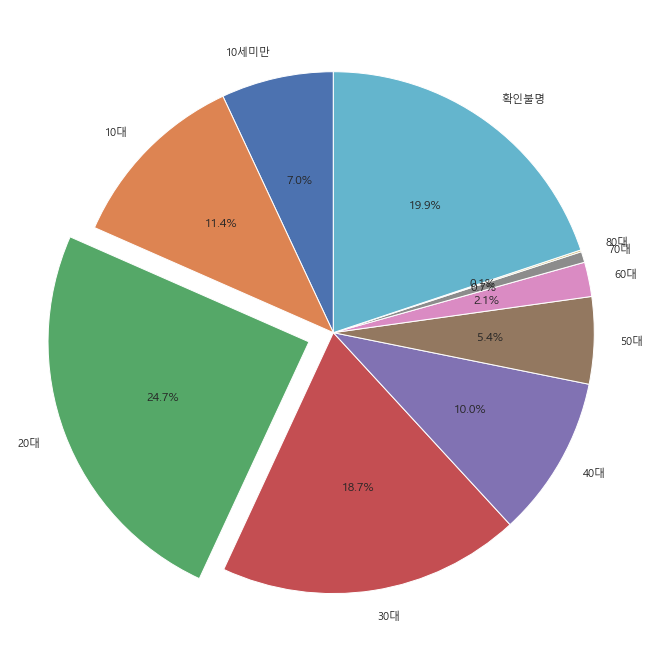

In [102]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '확인불명']
sizes = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes,explode = explode, labels = labels, autopct = 
       '%1.1f%%',shadow=False, startangle=90)

# ax1.axis('equal')

plt.show()

In [122]:
recipe = ["375 g flour",
          "75 g  sugar",
          "250 g butter",
          "300 g strawberry"]
data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

In [139]:
for x in recipe:
    data = x.split()[2]
    print(data)
    print(type(data))

flour
<class 'str'>
sugar
<class 'str'>
butter
<class 'str'>
strawberry
<class 'str'>


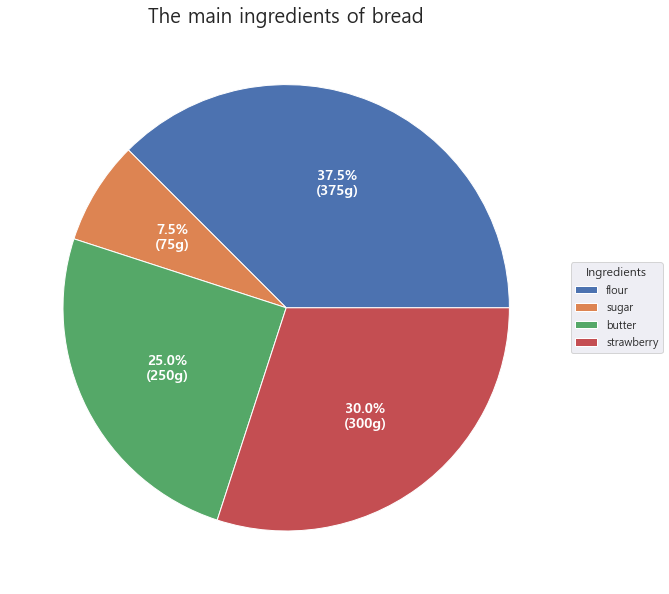

In [142]:
fig, ax = plt.subplots(figsize=(10,12), subplot_kw = dict(aspect='equal'))

recipe = ["375 g flour",
          "75 g  sugar",
          "250 g butter",
          "300 g strawberry"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

def func(pct, allvals):
    absolute = int(pct/100*np.sum(allvals))
    return '{:.1f}%\n({:d}g)'.format(pct,absolute)

wedges, texts, autotexts = ax.pie(data,autopct=lambda pct:func(pct,data)
                                  ,textprops=dict(color='w'))

ax.legend(wedges,ingredients,title='Ingredients'
          ,loc='center left',bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size=14,weight='bold')

ax.set_title('The main ingredients of bread',size=20)

plt.show()